<a href="https://colab.research.google.com/github/satyhim/Projects/blob/main/Customer_Seg_Propensity_Model_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*** CAPSTONE PROJECT 1 : PROPENSITY MODEL***

***About the Project : ***

We have large number of customers.Our sales team would like to call potential customers who can buy our service. We dont have enough manpower and time to call and reach every customer and convince them for our products. Also we need to rank customers so that we could offer them our product and services with discounted price.

***Requirenments:- ***

  
*   Customer segmentation : High value and Low value 
*   Potential Vs Nonpotential

*   Who can buy our service in current month- Prediction (Predict sale for 30, 60, 90 days)
*   Customer Lifetime value (Cltv) - Live Vs Dead Customers

*   Cohort analysis
*   Recency , Frequency and Monetary analysis.


***IMPORTING LIBRARIES***

List of all the python libraries that are required:


**Pandas** Library will be required to work with data in tabular representation.

**Numpy**Library will be required to round the data in the correlation matrix.

**Datetime** Library required to deal the data w.r.t. date, time month format.

**Matplotlib, seaborn, plotly** Library required for data visualization.

In [193]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#**1) Import DATA**

Now we need to import all the customer data and need to check the data with all the aspects that is : content of the data, number of rows and column, null entries, any other types of error are there or not, etc.


In [194]:
# We are going to import the data excel sheet which is stored onto google drive : 
# We are giving table name variable as : Customer_info

Customer_info=pd.read_excel("/content/drive/MyDrive/Python/Project/Online Retail.xlsx")

#Plotted the complete received data 
Customer_info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#Data information

As we can see in above table, we have 541909 rows × 8 columns.5

Column names are = InvoiceNo,	StockCode,	Description,	Quantity,	InvoiceDate,	UnitPrice,	CustomerID,	Country

In [195]:
#Shape and size of out data-table
print("The shape of our dataset is: ",Customer_info.shape)
print("The size of our dataset is: ",Customer_info.size)

The shape of our dataset is:  (541909, 8)
The size of our dataset is:  4335272


In [196]:
#To plot all the information of the received data
Customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [197]:
# Describe explains all the numerical data present in the given table
Customer_info.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [198]:
# Head option gives initial rows and column data
Customer_info.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [199]:
# tail option gives bottom rows and column data
Customer_info.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [200]:
# Now we need to check and clean all the null/NaN values , empty entries , any special character present in the data, etc
# To check null values
Customer_info.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#**2) Cleaning Data**

**Dealing with null values**:

Now as came to know that two column has null values that is Description column has 1454 null vales and CustomerID has 135080 null values.

So now we need to remove all the null values columns from the table


In [201]:
#To remove null values we use below syntax:
Customer_info.dropna(inplace=True)
Customer_info.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [202]:
# Now this table does not contain any null values:
Customer_info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Now We need to check weather any column has negative values or not. 
To check this we can use describe option:

In [203]:
Customer_info.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


As we can see we are having negative values in min row , so we need to either remove negative columns or convert them into positive, we can decide it once we know the quantity of negative rows. 

We need to check all the integer colums :

In [204]:
#As we know that some InvoceNo are started with letter C and its quantity are negative so we can search them to check

InvoiceNo_started_with_C=Customer_info[Customer_info['InvoiceNo'].astype(str).str.contains('C')]
InvoiceNo_started_with_C

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [205]:
# Ae we can see in above table total negative quantity row are 8905, this seems huge data loss if we remove them.
# So we can convert them from positive integers to negative with the help of abs() method.

Customer_info['Quantity'] = Customer_info['Quantity'].abs()
Customer_info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [206]:
# Now again we need to check table by using description option to check weather we have any negative values or not
Customer_info.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460471,15287.690570
std,248.624170,69.315162,1713.600303
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


So from above table we can see we dont have any negative values in our table. 

This completes the data cleaning process.

#**3) Data Processing**


Now we are going to create new column as Total_Price by multiplying Quantity and unit price values to get total purchase values of each customer

In [207]:
# Create new column of total price :
Customer_info['Total_price']=Customer_info['Quantity'] *Customer_info['UnitPrice']
Customer_info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


#CustomerID Groupby

We have to use groupby command for CustomerID column to find out total number of customers present in the data

In [208]:
# Groupby customerID gives us the exact amount of customers present 
Customer_count=Customer_info.groupby('CustomerID')
Customer_count.first()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_price
CustomerID,,,,,,,,
12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,77183.60
12347.0,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,25.20
12348.0,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,Finland,39.60
12349.0,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.50,Italy,15.00
12350.0,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,Norway,25.20
...,...,...,...,...,...,...,...,...
18280.0,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2011-03-07 09:52:00,7.90,United Kingdom,23.70
18281.0,556464,22037,ROBOT BIRTHDAY CARD,12,2011-06-12 10:53:00,0.42,United Kingdom,5.04
18282.0,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,2011-08-05 13:35:00,12.75,United Kingdom,12.75


As we can see in above table we have 4372 number of customers.



In [209]:
# Using groupby for country coulumn
Places=Customer_info.groupby('Country')
Places.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
395472,571035,21238,RED RETROSPOT CUP,8,2011-10-13 12:50:00,0.85,12446.0,RSA,6.80
395473,571035,21243,PINK POLKADOT PLATE,8,2011-10-13 12:50:00,1.69,12446.0,RSA,13.52
395474,571035,23240,SET OF 4 KNICK KNACK TINS DOILY,6,2011-10-13 12:50:00,4.15,12446.0,RSA,24.90
395475,571035,23209,LUNCH BAG VINTAGE DOILY,10,2011-10-13 12:50:00,1.65,12446.0,RSA,16.50


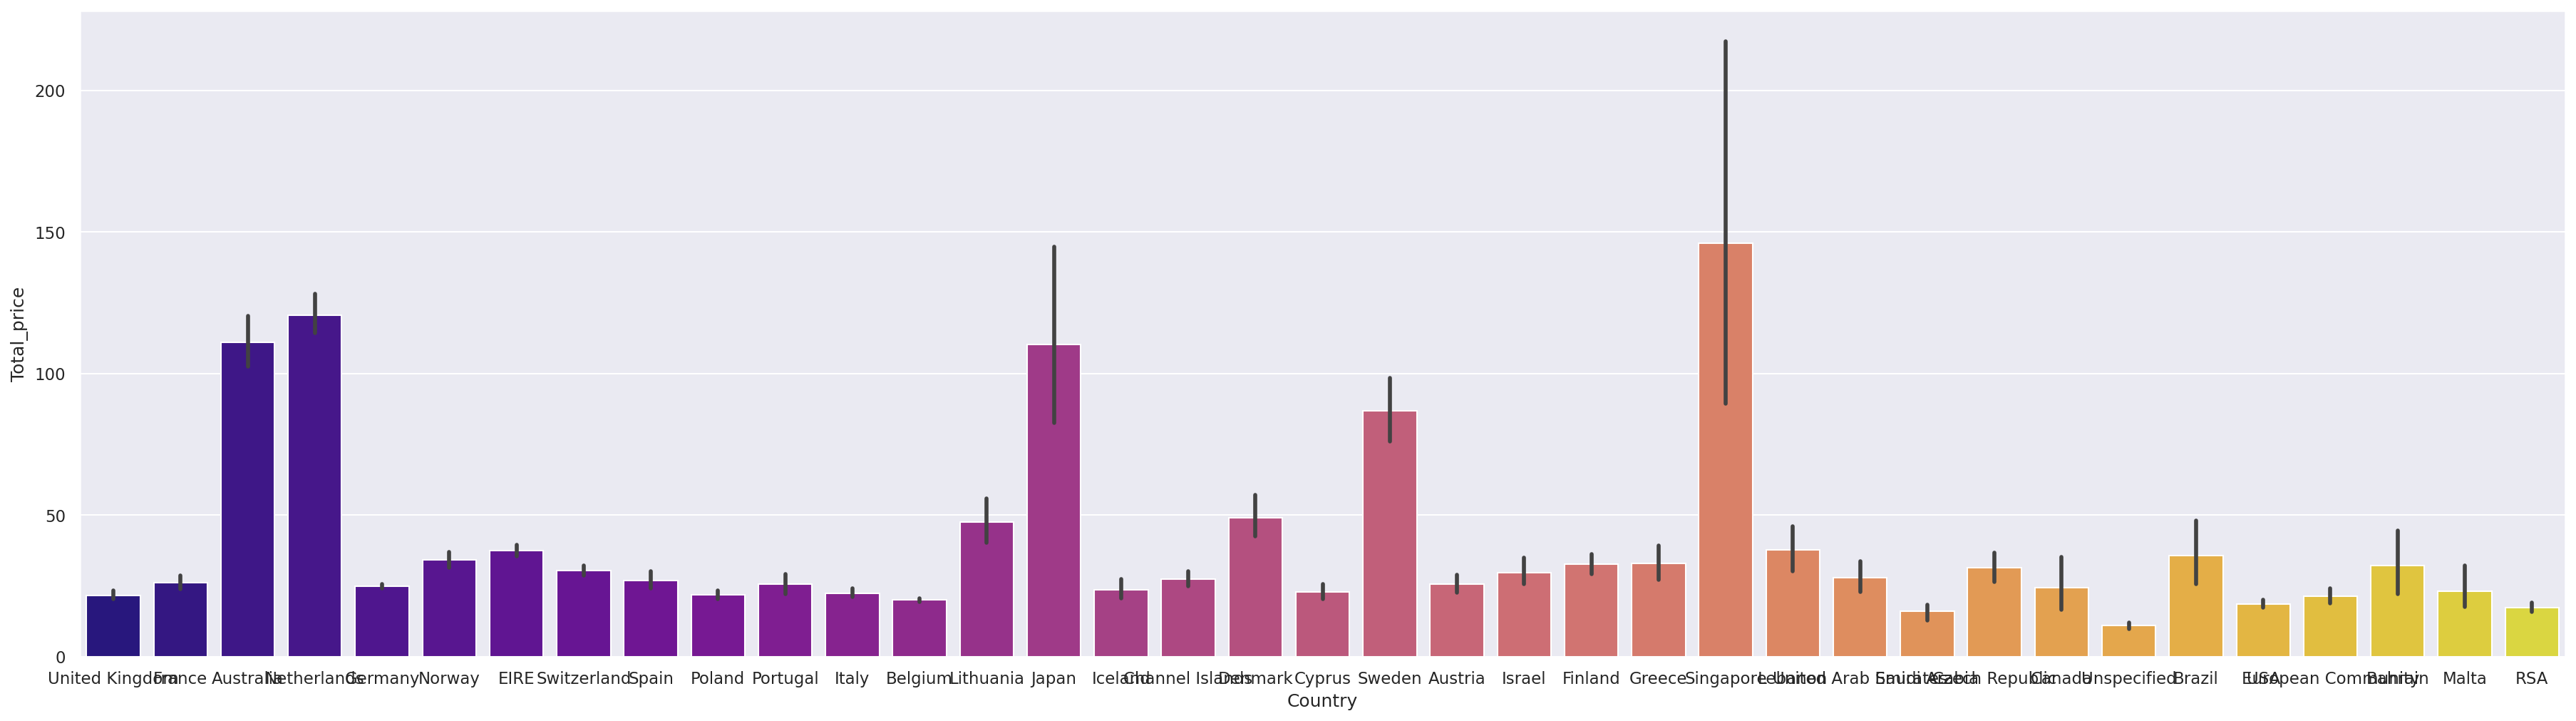

In [210]:
# set the background style of the plot
sns.set_style('darkgrid')

# plot the graph using the default estimator mean
plt.subplots(figsize=(30,8), dpi=150)
sns.barplot(x ='Country', y ='Total_price', data =Customer_info, palette ='plasma')

***Bar Plot conclusion: ***


From the above plot we came to know that most of the comtries total purchase value is in between 10 to 50. Only 8 to 10 countries are having more purchase value . Those countries are Austrlia, Netherland, Lithuania, Japan, Denmark, Sweden, Singapor, Brazil,etc.

So maximum customers price of purchase is in between 10 to 50.

(array([2.57533e+05, 8.90010e+04, 3.42280e+04, 6.03000e+03, 7.22200e+03,
        9.86000e+02, 9.53000e+02, 2.05400e+03, 2.72000e+02, 1.86700e+03,
        2.00000e+03, 3.00000e+01, 7.82000e+02, 1.50000e+01, 1.11300e+03]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150]),
 <a list of 15 Patch objects>)

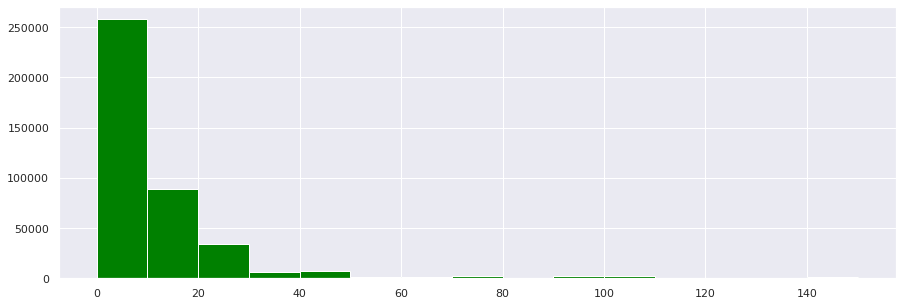

In [211]:
# To check Quantity of purchase we can check below plot:

plt.subplots(figsize=(15,5))
sns.set_style('darkgrid')
plt.hist(Customer_info['Quantity'], bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150],facecolor='green')

#RFM Analysis:

***What is RFM analysis?***


RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

RFM analysis is a set of segmentation strategies used to drive the marketing strategy for retaining customers and keeping them doing business with you longer. These strategies are typically used to offer more expensive and expansive products and services to your customer segment(s).



**Recency**: How recently has the customer made a transaction with us

**Frequency**: How frequent is the customer in ordering/buying some product from us

**Monetary**: How much does the customer spend on purchasing products from us.

**Recency (R) as days since last purchase:** How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago?

**Frequency (F) as the total number of transactions:** How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10.

**Monetary (M) as total money spent:** How many $$ (or whatever is your currency of calculation) has this customer spent? Simply total up the money from all transactions to get the M value.

***Things to do next:***

To do the RFM analysis in our data we need to extract these three important values that is Recency, Frequency and Monetary value. After calculating these values we have to calculate their related score values and based on this data we will get RFM score value.

With the help of RFM score we can rank the different customer based on their RFM score value as an High value, Low value, potential, non potential, dead customers, etc.

In [212]:
# As we know out dataset
Customer_info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [213]:
# To calculate the RFM values we should know the last or recent purchase date of our data:
Customer_info.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [214]:
# We will store this date into an variable to use in further operations:
Latest_date = dt.datetime(2011,12,10)

In [215]:
# To calculate RFM we have:

RFM_combine=Customer_info.groupby('CustomerID').agg({'InvoiceDate':lambda x:(Latest_date-x.max()).days,'InvoiceNo':lambda x:len(x),'Total_price':lambda x: x.sum()})
RFM_combine.head(10) 

,InvoiceDate,InvoiceNo,Total_price
CustomerID,,,
12346.0,325,2,154367.20
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,95,3466.67
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


This table InvoiceDate , InvoceNo and Total_price columns are nothing but the Recency , frequency and monetary values, so we can rename them as R, F, M.

In [216]:
# Column rename:
RFM_combine.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total_price':'monetary_value'},inplace=True)
RFM_combine.head()

,Recency,Frequency,monetary_value
CustomerID,,,
12346.0,325,2,154367.20
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [217]:
# Checking the output data
RFM_combine.describe()

,Recency,Frequency,monetary_value
count,4372.000000,4372.000000,4372.000000
mean,91.581199,93.053294,2178.122140
std,100.772139,232.471608,10502.255527
min,0.000000,1.000000,0.000000
25%,16.000000,17.000000,308.570000
50%,50.000000,42.000000,677.975000
75%,143.000000,102.000000,1696.285000
max,373.000000,7983.000000,336942.100000


In [218]:
# Calculating the RFM score values by using qcat option:
RFM_combine["Recency_Score"]= pd.qcut(RFM_combine["Recency"],5,labels=[5,4,3,2,1])
RFM_combine["Frequency_Score"]= pd.qcut(RFM_combine["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
RFM_combine["Monetary_Score"]=pd.qcut(RFM_combine["monetary_value"],5, labels=[1,2,3,4,5])
RFM_combine.head()

,Recency,Frequency,monetary_value,Recency_Score,Frequency_Score,Monetary_Score
CustomerID,,,,,,
12346.0,325,2,154367.20,1,1,5
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,18,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2


In [219]:
# To calculate the RFM score we need to add recency score and frequency score values as string:
RFM_combine["RFM_score"]=RFM_combine["Recency_Score"].astype(str)+RFM_combine["Frequency_Score"].astype(str)
RFM_combine.head(10)

,Recency,Frequency,monetary_value,Recency_Score,Frequency_Score,Monetary_Score,RFM_score
CustomerID,,,,,,,
12346.0,325,2,154367.20,1,1,5,11
12347.0,2,182,4310.00,5,5,5,55
12348.0,75,31,1797.24,2,3,4,23
12349.0,18,73,1757.55,4,4,4,44
12350.0,310,17,334.40,1,2,2,12
12352.0,36,95,3466.67,3,4,5,34
12353.0,204,4,89.00,1,1,1,11
12354.0,232,58,1079.40,1,3,4,13
12355.0,214,13,459.40,1,1,2,11


In [221]:
# Now we need to create one duplicate column of RFM score in the name of segment to give ranking for each customer
RFM_combine['Segment'] = RFM_combine['RFM_score']
RFM_combine.head()

,Recency,Frequency,monetary_value,Recency_Score,Frequency_Score,Monetary_Score,RFM_score,Segment
CustomerID,,,,,,,,
12346.0,325,2,154367.20,1,1,5,11,11
12347.0,2,182,4310.00,5,5,5,55,55
12348.0,75,31,1797.24,2,3,4,23,23
12349.0,18,73,1757.55,4,4,4,44,44
12350.0,310,17,334.40,1,2,2,12,12


In [222]:
# Here we are deciding different customers ranking as per the segment values

seg_map = {
    r'[1-2][1-2]': 'Low_Value',
    r'[1-2][3-4]': 'Risky',
    r'[1-2]5': 'VIP_Customers',
    r'3[1-2]': 'sleep_Customers',
    r'33': 'Less_Focussed',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'Confirm_Customers',
    r'51': 'New',
    r'[4-5][2-3]': 'potential',
    r'5[4-5]': 'Max_Purchasing'
}

In [223]:
# Mapping of ranking names and customer :
RFM_combine['Segment'] = RFM_combine['Segment'].replace(seg_map, regex=True)
RFM_combine.reset_index(inplace=True)
RFM_combine.head()

,CustomerID,Recency,Frequency,monetary_value,Recency_Score,Frequency_Score,Monetary_Score,RFM_score,Segment
0,12346.0,325,2,154367.20,1,1,5,11,Low_Value
1,12347.0,2,182,4310.00,5,5,5,55,Max_Purchasing
2,12348.0,75,31,1797.24,2,3,4,23,Risky
3,12349.0,18,73,1757.55,4,4,4,44,loyal_customers
4,12350.0,310,17,334.40,1,2,2,12,Low_Value


In [224]:
# We can check here how many customer ID are falling under which ranking:

RFM_combine.groupby('Segment').agg({"CustomerID":"count"}).sort_values("CustomerID",ascending=False)

,CustomerID
Segment,
Low_Value,1062
loyal_customers,826
Max_Purchasing,620
Risky,579
potential,512
sleep_Customers,328
Less_Focussed,208
Confirm_Customers,96
VIP_Customers,83


So based on this table we can conclude that there are total 10 segments in which we have divided all the customers as per their ranking of segment and RFM score.

Maximum customers are falling under hibernating cateogory, next is loyal customer cateogory.

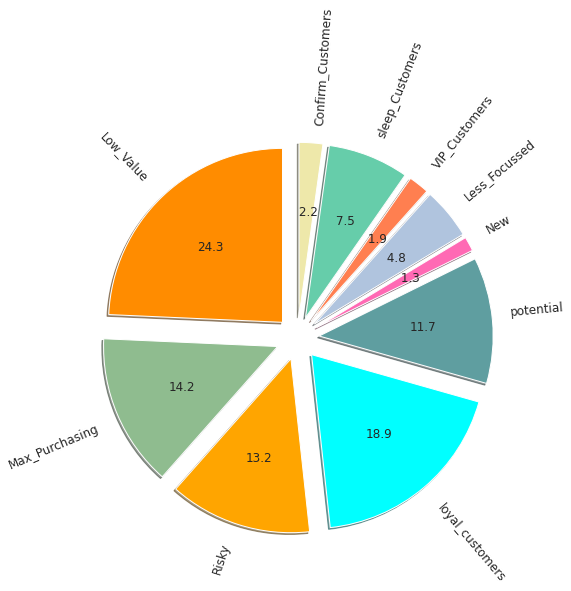

In [225]:
colors  = ("darkorange", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine","palegoldenrod")
explodes = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

RFM_combine["Segment"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True, 
                                                 explode = explodes)
plt.ylabel("");

#Conclusion:




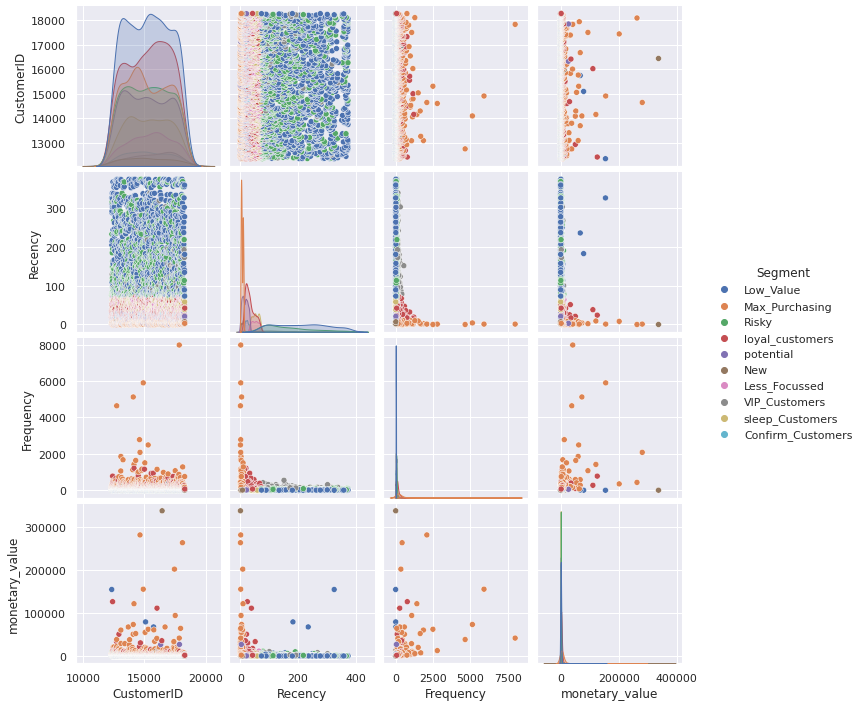

In [226]:

sns.pairplot(RFM_combine, hue="Segment")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


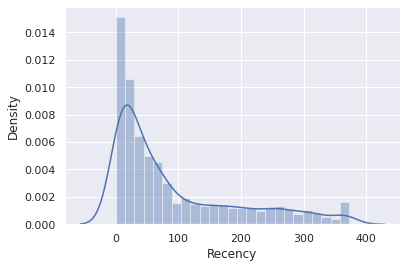

In [227]:
sns.distplot(RFM_combine['Recency'])



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


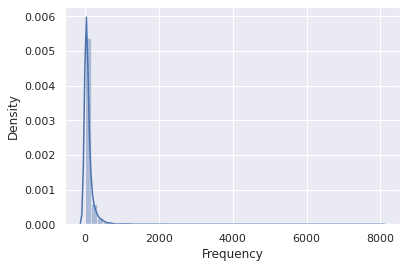

In [228]:
sns.distplot(RFM_combine['Frequency'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


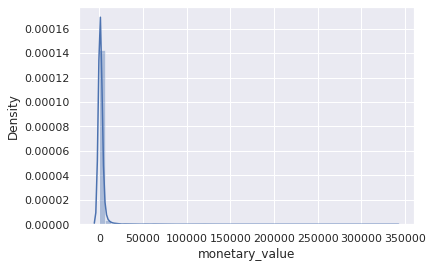

In [229]:
sns.distplot(RFM_combine['monetary_value'])

In [230]:
RFM_combine.head()

,CustomerID,Recency,Frequency,monetary_value,Recency_Score,Frequency_Score,Monetary_Score,RFM_score,Segment
0,12346.0,325,2,154367.20,1,1,5,11,Low_Value
1,12347.0,2,182,4310.00,5,5,5,55,Max_Purchasing
2,12348.0,75,31,1797.24,2,3,4,23,Risky
3,12349.0,18,73,1757.55,4,4,4,44,loyal_customers
4,12350.0,310,17,334.40,1,2,2,12,Low_Value


In [231]:
RFM_combine[["Segment","Recency", "Frequency", "monetary_value"]].groupby("Segment").agg(["mean", "count","sum"]).reset_index()

Segment     Recency                 Frequency                \
                            mean count     sum        mean count     sum   
0  Confirm_Customers   21.937500    96    2106    7.020833    96     674   
1      Less_Focussed   51.225962   208   10655   41.764423   208    8687   
2          Low_Value  212.024482  1062  225170   13.357815  1062   14186   
3     Max_Purchasing    4.943548   620    3065  287.088710   620  177995   
4                New    6.275862    58     364    7.517241    58     436   
5              Risky  165.654577   579   95914   56.682211   579   32819   
6      VIP_Customers  141.746988    83   11765  183.024096    83   15191   
7    loyal_customers   32.280872   826   26664  162.175545   826  133957   
8          potential   15.027344   512    7694   34.582031   512   17706   
9    sleep_Customers   51.817073   328   16996   15.786585   328    5178   

  monetary_value                     
            mean count          sum  
0     427.524271    96    41042.330  
1     891.652361   208   185463.691  
2     673.985633  1062   715772.742  
3    7198.984613   620  4463370.460  
4    6489.990000    58   376419.420  
5     995.044059   579   576130.510  
6    2380.900373    83   197614.731  
7    2845.158051   826  2350100.550  
8     909.153262   512   465486.470  
9     461.430152   328   151349.090